<a href="https://colab.research.google.com/github/imryav/saKvar/blob/master/fdm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FDM Computational Project<br/>1D Damped Wave Equation**

<small> version: 23.05.25a</small>

* Main objective: design a simulator using
  **Finite Difference Method (FDM)**
  for solving a 1D wave equation numerically.

* **FDM** is a numerical method for solving differential
  equations and many other types of mathematical problems,
  which is explained in details at the course
  lecture notes and the official project booklet,
  with many examples that can help you
  with this project.

* Before starting to work on this project, please read the
  project booklet ("fdm.pdf"), and make sure you understand
  the examples of the heat and wave equations there.
  You will find there links to other Google Colab notebooks
  which should give you a good start for this project (מטלה תיכנותית).

* Try to solve the theoretical assignment before you start
  with this project.

* You have to download a copy of this notebook to your
  private Google drive and work on your private copy.

* Please keep the same name: **"fdm_project.ipynb"**.

* After completing work, you should upload it to
  your Moodle assignment box for the FDM programming project.

## **Python, Google Colab, and LaTeX Tutorials**

* To do this project you will need to invest an hour
  or two (at least) on basic training on Python,
  Google Colab, and LaTeX basics.

* Please open the following notebook and follow
  the tutorials there:  
  https://colab.research.google.com/github/samyzaf/notebooks/blob/main/tutorials.ipynb

## **Restart and Cleanup**
* It is easy to get into troubles when you
  execute code. In such cases your notebook may be
  invalidated and you will have to restart.

* To restart your notebook, go to
  **Runtime** menu button and select the
  **Disconnect and delete runtime** item.

* It is also recommended to clear all outputs
  (**Edit** --> **Clear all outputs**).

* After restart, make sure to run all code cells
  **sequentially**.
  * Running code cells in the wrong order can
  result in a corrupt notebook and then you have to restart
  again.

## **Installation and Loading**
* The **FDM Project** is based on our
  Python package:
  [**fdmtools**](https://samyzaf.com/fdmtools.zip).

* Python coders can download it and inspect the code.
  But the usage is simple and explained in the many examples
  in the course project booklet ("fdm.pdf")
  which you should find in the Moodle site,
  and the many Google Colab notebooks that accompany it.

* Execute the next code cell in order to install
  and load the
  [**fdmtools Package**](https://samyzaf.com/fdmtools.zip).

* At each stage you can restart your session
  from the **Runtime** menu ("Disconnect and delete runtime")
  if you get into trouble.

In [2]:
%pip install -q https://samyzaf.com/fdmtools.zip   # Install fdmtools package on your Google virtual machine
from fdmtools.wave1 import *                       # Import fdmtools commands to this notebook

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
fdmtools version: 8


## **Registration**
* Please enter your name, identity number, and email
  address in the following form.
* After any change, press the **play** button &#9658; to update.
* After registration, you will you will be assigned a personal
  PDE problem to work on.

In [3]:
# @title #**Student Form** {"form-width":"50%"}
Name = 'אמרי אברם' # @param {type:"string"}
Id = '213782139' # @param {type:"string"}
Email = 'imry.avram@campus.technion.ac.il ' # @param {type:"string"}

RunFile("wave1damp_form")

<IPython.core.display.Latex object>

## **Description**
* Your mission is to use **FDM**
  for solving a special type of a 1D wave equation over
  a one dimensional string (of finite length $L$), which
  is usually named **"Damped Wave Equation"**.

* For simplicity we use constant boundary conditions
  of a Dirichlet type.

* The typical 1-dimensional wave equation $u_{tt} = c^2 u_{xx}$
  deals with the propagation of wave along a finite string
  (such as a guitar chord or an electrical wave signal)
  along a finite period of time.

  Where $u(x,t)$ is the **altitude** of the wave
  at a point $x$ at time $t$,
  and $c$ is a physical constant related to the string type.

* In real life scenarios, this simple model is not enough,
  and we have to take into account other factors such as
  friction and [damping](https://en.wikipedia.org/wiki/Damping).

* Our project deals with the more general type of
  a 1D wave equation  

  $\large\qquad u_{tt} + 2\beta u_t = c^2 u_{xx}$  

  where $\beta$ is the **damping coefficient**,
  and $c$ is a **positive** physical constant
  which models the wave speed.

* This equation describes how disturbances propagate over time
  and space, subject to initial and boundary conditions.   

  <IMG
  src="https://samyzaf.com/fdm/wave1d2b.jpg"
  width=600
  align="center"
  />

## **Your Differential Equation Problem**

* The values of the coefficients $c$, $\beta$,
  and the boundary conditions,
  were assigned to you at the registration stage.

* These are unique values assigned for each student
  as a function of your **ID** number.

* You can print your problem again at any stage
  by the following command.

In [ ]:
display_my_pde()

<IPython.core.display.Latex object>

* The physical time $T$ is determined
  by the simulation time which we will define later.

## **Basic parameters**
* As mentioned, our string is modeled as an interval $[0,L]$
  on the real $x$-axis, with the following **FDM** parameters
* **L** = String Length
* **N** = Grid division parameter for the interval $[0,L]$
* **c** = Physical wave speed parameter
* **beta** = Physical damping coefficient
* **dt** = Time grid unit
* **fps** = Frames Per Second (for video simulation)
* **seconds** = Video Simulation time (also video duration)
* **num_frames** = Total number of **video frames** in our simulation
* **dx** = $x$ grid unit (L/N)
* **U** = 2D Numpy Array (holds the FDM grid)

## **Agenda**

* Our project is to use the **Finite Difference Method (FDM)**
  for finding a discrete numerical solution
  to the **damped wave equation** above on a string
  of length **L=4** and physical time $T$.
  
* The value of the physical time $T$ depends on
  * **seconds** - our simulation time
  * **fps** - number of video frames per second
  * **dt** - our discrete time unit  

  **T = seconds * fps * dt**.

* Here is our **FDM Parameter Plan** for this problem.

* Make sure to uncomment and insert the correct
  values of **beta** and **c** according to
  your assigned **PDE**!

* You may experiment with other values in your solution
  process.

In [7]:
L = 4.0                    # Length of string
N = 200                    # Grid division size
# Uncomment and insert correct values of beta and c!
c = 6.00                    # Physical wave speed constant (in the equation). Find your correct value!
beta = -0.27                  # Damping coefficient (in the equation). Find your correct value!
fps = 30                   # Frames per second (for video simulation)
seconds = 30               # Simulation time (video duration)
num_frames = seconds*fps   # Total number of time frames
dx = L/N                   # Step sizes = x,y grid units
# The standard definition of gamma is
# gamma = c*dt/dx
# See class notes or project booklet.
# We take a different approach and first define gamma and then dt!
gamma = 0.85               # Make sure CFL (Courant/Friedrich/Lewy) condition is met: gamma = c*dt/dx <= 1
dt = gamma * dx/c          # Automatic choice for dt (See link below)
T = seconds * fps * dt     # Physical time (the real time)
U = np.zeros((N+1, num_frames))    # Our FDM grid container

print(f"dx = {dx}")
print(f"dt = {dt}")
print(f"gamma = {gamma}")
print(f"T = {T}")

dx = 0.02
dt = 0.0028333333333333335
gamma = 0.85
T = 2.5500000000000003


* The **CFL** parameter refers to the
  [Courant/Friedrich/Lewy condition](https://en.wikipedia.org/wiki/Courant%E2%80%93Friedrichs%E2%80%93Lewy_condition)
  for selecting a stable good value for **dt**.

* The stability condition that guarantees convergence of our
  discrete approximation to a valid solution is  

  $\qquad
  \gamma = \dfrac{c\Delta t}{\Delta x} \leq 1
  $  

  where $c$ is the physical wave constant.
  [Look at this **GPT** generated document for more details.](https://samyzaf.com/fdm/gpt_fdm_stability.pdf)

* By selecting $\gamma=0.85$, we ensure that the **CFL**
  stability condition $\gamma\leq 1$ is met.

* Note that by selecting $\gamma$, the value of $\Delta t$
  is automatically determined by
  $\gamma= \frac{c\Delta t}{\Delta x}$.
  That is: $\Delta t = \frac{\gamma \Delta x}{c}$.

* However, it is possible to experiment with other
  values for **dt** for controlling the speed and duration
  of the simulation.

## **Boundary Conditions**

* The general form of a Dirichlet 1D wave equation boundary
  conditions are:  

  $\qquad
\left\{
    \begin{array}{ll}
    u(x,0) = f(x),  &\quad 0\leq x \leq L
    \\[0.5ex]
    u_t(x,0) = g(x),  &\quad 0\leq x \leq L
    \\[0.5ex]
    u(0,t) = f_1(t), &\quad 0\leq t\leq T
    \\[0.5ex]
    u(L,t) = f_2(t), &\quad 0\leq t\leq T
    \end{array}
\right.
$  

## **TASK 1: Boundary Conditions**
* Based on the particular problem assigned to you,
  you should identify the boundary conditions for your
  case and write them in the following Python code cell.

In [8]:
f  = lambda x: x*(4-x)*sin(pi*x)+1.7*x
g  = lambda x: 0.34*x
f1 = lambda t: 0.0
f2 = lambda t: 6.8

## **TASK 2: $\bf\LaTeX$ formulas**
* Solve your differential equation using the **FDM** method.

* You should obtain a recursion formula which
  computes the value of **U[i,k]** by previous
  terms such as **U[..,k-1]**, **U[..,k-2]**.
  * It should not contain any derivatives of **U**.
  * It should be simplified.

* Make sure to use your boundary conditions!

* Edit the next text cell and write
  the following four formulas in $\LaTeX$ format
  1. The difference derivative $U_t$ which you used,
  2. The difference derivative $U_{tt}$ which you used,
  3. The difference derivative $U_{xx}$ which you used,
  4. Your final recursion formula for computing the
     FDM grid $U$ on time frame **k** from the previous
     layers **k-1**, **k-2**.  
     * To be clear: derivatives of $U$ on the right side
       are not allowed!
     * You may use intermediate expressions such as
       $\gamma$ or **DU**, but you need to write their LaTeX
       form in a separate line.
     * Your recursion formula may be limited to a restricted
       range of **i**, **k**, values.
       So you are also required to specify the valid range of the
       indices **i**, **k**, for which your recursion
       formula is valid.
     * The range style should be:
       $i = a,...,b$.
       That is: $i$ starts with $a$ and ends with $b$
     * Examples:
       * $i=2,...,N-1$
       * $k=3,...,N_t-2$.
* To edit a text cell: select the cell,
  and use the edit button on the top
  right menubar of the cell  

  <IMG
src="https://samyzaf.com/fdm/colab_cell_menubar.jpg"
width=400
align="center"
/>

* You may need a quick tour of
  the $\LaTeX$ (LaTeX) system for writing math formulas.
  It shouldn't take you more than 5 minutes to get the idea.
  Please look at the short LaTeX guide
  in our Tutorials notebook:
  https://colab.research.google.com/github/samyzaf/notebooks/blob/main/tutorials.ipynb

### **Please complete the following LaTeX formulas**  
1. $U_t[i,k] =  \frac {U[i,k+1]-U[i,k]}{dt}$

2. $U_{tt}[i,k] = \frac {U[i,k+1]-2U[i,k]+U[i,k-1]}{dt^2}$

3. $U_{xx}[i,k] = \frac {U[i+1,k]-2U[i,k]+U[i-1,k]}{dx^2}$

4. $U[i,k] =U[i,k]$  
   $i=2,...,N_x$  
   $k=2,...,num_frames-1$

## **TASK 3: Python Code**
* In this task you have to convert your recursion formula
  that you obtained in the previous task into
  a working Python code!

* Your main mission is to write a Python
  function **Solve(U)** which accepts **U** as an argument,
  solves the equation, and updates **U**.

* We started with an zeroes grid **U**, and your Python
  function **Solve(U)** should fill **U** with
  numerical values that approximate a solution to
  our differential equation.

* Write your **Solve(U)** function code in
  the following code cell (and execute it).

In [11]:
# Write your Solve(U) code here
def Solve(U):
    for k in range(1, num_frames - 1):
        for i in range(1, N):
            U[i, k+1] = (
                (2 - 2*beta*dt) * U[i, k] +
                (2*beta*dt - 1) * U[i, k-1] +
                gamma**2 * (U[i+1, k] - 2*U[i, k] + U[i-1, k])
            )


* After writing your **Solve(U)** function, you need to run the
  simulation phase.

* The **RunSimulation()** function automatically
  applies your boundary conditions
  on **U** and then executes your **Solve(U)** function.

* If passed successfully, then your FDM grid **U**
  is ready to rock!
  
* You may use it to approximate the solution
  **u(x,t)** of our problem at any point inside the domain.

* We also provide a **PlotWaveFrame** method for plotting
  your solution at a given time frame, as a debug aid.

* Execute the next code cell to run the simulation.

In [12]:
RunSimulation()
MakeVideo()

gamma = 0.8500000000000001<=1, CFL OK.
Solve time: 0.335
Umin = -4.9216483456755356
Umax = 11.532384558680405
Simulation is done!
You may now use the grid U for calculations and visualization.
You may use the MakeVideo command for animating your solution.
Animating: 100%   
Time: 160.27 seconds
Saved video file: heatd1.mp4
Done!
Simulation time = 30 seconds
Physical time = 2.5500000000000003 seconds
Number of video frames = 900
Frames per second = 30
dx = 0.02
dt = 0.0028333333333333335
Playing video file:


Video file = heatd1.mp4
You may download it to your local device by: file_download(video_file)


## **TASK 4: best approximation of $u(x_0, t_0)$**
* The point $(x_0,t_0)$ was assigned at the
  registration stage.
  You may access their values by `par.x0` and `par.t0`.
* In this task you have to write code for approximating
  the value of $u(x_0, t_0)$ using your FDM grid **U**.

* This point may not be a grid node!
  So you must devise the best plan to approximate the
  value of $u(x0,y0)$ on it.

* Write your code in the following code cell.

In [18]:
    x0, t0 = par.x0, par.t0

    i = int(x0 // dx)
    k = int(t0 // dt)

    x_i = i * dx
    x_ip1 = (i + 1) * dx
    t_k = k * dt
    t_kp1 = (k + 1) * dt

    tx = (x0 - x_i) / dx
    tt = (t0 - t_k) / dt

    u_ik = U[i, k]
    u_ip1k = U[i+1, k]
    u_ikp1 = U[i, k+1]
    u_ip1kp1 = U[i+1, k+1]

    u_approximate = (
        (1 - tx) * (1 - tt) * u_ik +
        tx * (1 - tt) * u_ip1k +
        (1 - tx) * tt * u_ikp1 +
        tx * tt * u_ip1kp1)

## **Plotting**

* To help with debugging your code, we provide
  a plotting utility (**PlotWaveFrame**)
  for viewing wave frames.

* You can configure the following plotting parameters
  to inspect your solution.

In [14]:
# plotting parameters
text_x = 0.00                 # x coordinate for top text
text_y = 1.07                 # y coordinate for top text
math_x = 0.52                 # x coordinate for math text
figure_width = 5              # Figure width in inches
dpi = 120                     # Video resolution (dots per inch)
fontsize = 9                  # Text font size
linespacing = 1.5             # Spacing between text lines

math_text = [                 # LaTeX Math formula text for video
    r"$u_{tt} + 2\beta u_t = c^2 u_{xx}$",
    r"$u(0,t) = f(x)$",
    r"$u_t(0,t) = g(x)$",
    r"$u(0,t) = f_1(t)$",
    r"$u(2,t) = f_2(t)$",
]

### **Plotting frames of your solution**
* You can plot a particular wave frame by
  using the **PlotWaveFrame** function.

* For example, to plot frame k=500 use the command:

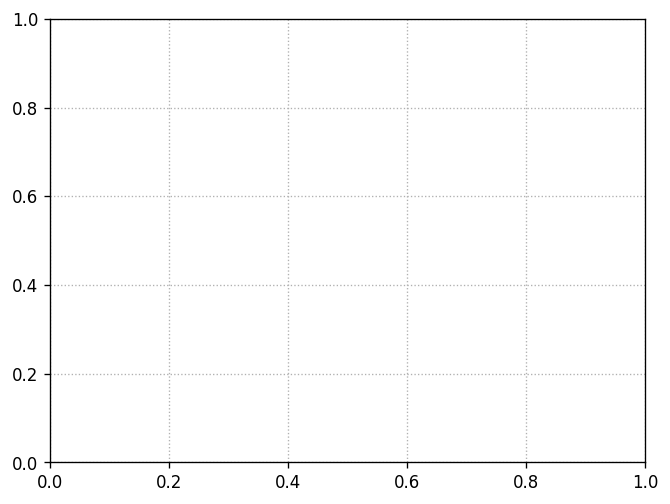

<Figure size 768x576 with 0 Axes>

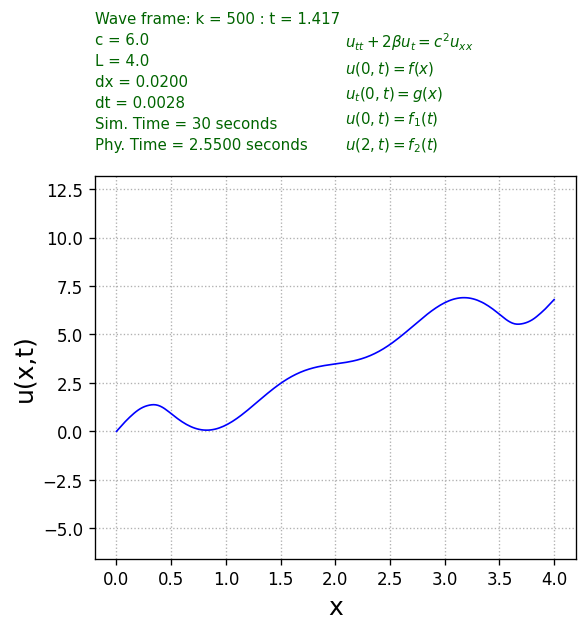

In [15]:
PlotWaveFrame(500)

## **Final Comments**
* Students interested in how the Numpy array is initialized
  with the boundary conditions can download the
  **[fdmtools package](https://samyzaf.com/fdmtools.zip)**
  and browse the Python code for all the details.

* You may also use the **MakeVideo()** utility to
  view your simulation visually.

* Make sure you don't forget to fill your details in the
  registration form above.
  The most important detail is your ID number!

* After completing this project, you should save the notebook as
  an **ipynb** file on your local drive:
  **File-->Download-->Download .ipynb**.
  Then upload it to the
  assignment box of the Moodle project page.
  * Make sure you keep the same name:
    **"fdm_project.ipynb"**.

* **GOOD LUCK!**